In [1]:
import pandas as pd
import numpy as np
import json
from  itertools import combinations , combinations_with_replacement , product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
neighborhood_distance_matrix = pd.read_csv("data/neighborhood_distance_matrix.csv")
neighborhood_distance_matrix.index = neighborhood_distance_matrix.neighborhood
neighborhood_distance_matrix

,neighborhood,Allston,Back Bay,Beacon Hill,Brighton,Charlestown,Dorchester,Downtown,East Boston,Fenway,...,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,Harbor Islands,West Roxbury
neighborhood,,,,,,,,,,,,,,,,,,,,,
Allston,Allston,0.000000,3.077847,4.394937,1.461400,4.836603,4.848876,2.322939,7.165537,2.883836,...,1.594806,14.144868,1.493398,3.346525,5.725403,6.234179,4.056581,9.328047,24.083485,2.322939
Back Bay,Back Bay,3.077847,0.000000,1.330085,4.535880,1.808956,1.911942,5.022177,4.116450,0.222458,...,1.564233,14.611495,3.337057,0.525486,2.651813,3.156518,0.986568,12.403580,21.391753,5.022177
Beacon Hill,Beacon Hill,4.394937,1.330085,0.000000,5.855775,0.519435,1.182930,6.339256,2.786541,1.542477,...,2.892932,15.207922,4.625689,1.278898,1.398954,1.852717,0.494871,13.709463,20.158844,6.339256
Brighton,Brighton,1.461400,4.535880,5.855775,0.000000,6.297584,6.269701,1.498995,8.626668,4.338373,...,3.020239,14.033700,2.067765,4.782608,7.178671,7.692283,5.510560,7.880627,25.440197,1.498995
Charlestown,Charlestown,4.836603,1.808956,0.519435,6.297584,0.000000,1.430639,6.830629,2.329227,2.027614,...,3.371265,15.639779,5.129892,1.797577,1.172763,1.505382,1.009669,14.126679,19.640748,6.830629
Dorchester,Dorchester,4.848876,1.911942,1.182930,6.269701,1.430639,0.000000,6.484549,2.876303,2.043604,...,3.255806,14.291742,4.709524,1.513694,1.183144,1.749246,1.038811,14.144759,20.473896,6.484549
Downtown,Downtown,2.322939,5.022177,6.339256,1.498995,6.830629,6.484549,0.000000,9.115205,4.803018,...,3.468230,12.571210,1.777565,5.122045,7.534344,8.086209,5.918812,7.899306,26.319748,0.000000
East Boston,East Boston,7.165537,4.116450,2.786541,8.626668,2.329227,2.876303,9.115205,0.000000,4.328673,...,5.679340,16.777237,7.380223,4.001129,1.693620,1.129551,3.197355,16.449104,17.597894,9.115205
Fenway,Fenway,2.883836,0.222458,1.542477,4.338373,2.027614,2.043604,4.803018,4.328673,0.000000,...,1.350719,14.460671,3.114708,0.564767,2.841569,3.355617,1.172755,12.211809,21.613969,4.803018


In [5]:
unique_neighborhood = neighborhood_distance_matrix.index.tolist()

In [17]:
neighborhood_pair = pd.DataFrame(list(product(unique_neighborhood,repeat=2)))
neighborhood_pair.columns = ['neighborhood1','neighborhood2']
neighborhood_pair = neighborhood_pair[neighborhood_pair['neighborhood1'] != neighborhood_pair['neighborhood2']]
neighborhood_pair

,neighborhood1,neighborhood2
1,Allston,Back Bay
2,Allston,Beacon Hill
3,Allston,Brighton
4,Allston,Charlestown
5,Allston,Dorchester
6,Allston,Downtown
7,Allston,East Boston
8,Allston,Fenway
9,Allston,Hyde Park
10,Allston,Jamaica Plain


In [18]:
def return_distance(row):
    return neighborhood_distance_matrix.loc[row.neighborhood1,row.neighborhood2]

neighborhood_pair['neighborhood_distance'] = neighborhood_pair.apply(return_distance ,axis=1)
neighborhood_pair

,neighborhood1,neighborhood2,neighborhood_distance
1,Allston,Back Bay,3.077847
2,Allston,Beacon Hill,4.394937
3,Allston,Brighton,1.461400
4,Allston,Charlestown,4.836603
5,Allston,Dorchester,4.848876
6,Allston,Downtown,2.322939
7,Allston,East Boston,7.165537
8,Allston,Fenway,2.883836
9,Allston,Hyde Park,2.240952
10,Allston,Jamaica Plain,1.679266


In [20]:
json1_file = open("data/neighborhood_map.json")
json1_str = json1_file.read()
json1_data = json.loads(json1_str)
neighborhood = pd.DataFrame([(key, x) for key,val in json1_data.items() for x in val], columns=['neighborhood1', 'neighborhood1'])
neighborhood.columns = ['neighborhood1','neighborhood2']
#stop_by_line  = stop_by_line.set_index('Stop')
neighborhood['is_neighbor']=1
neighborhood.shape

(93, 3)

In [21]:
neighborhood_pair = neighborhood_pair.merge(neighborhood,left_on=['neighborhood1','neighborhood2'],right_on=['neighborhood1','neighborhood2'],how='left')#[['neighborhood1','neighborhood2','is_neighbor_y']]
neighborhood_pair.columns = ['neighborhood1','neighborhood2','is_neighbor','neighborhood_distance']
neighborhood_pair = neighborhood_pair.fillna(0)
neighborhood_pair

,neighborhood1,neighborhood2,is_neighbor,neighborhood_distance
0,Allston,Back Bay,3.077847,0.0
1,Allston,Beacon Hill,4.394937,0.0
2,Allston,Brighton,1.461400,1.0
3,Allston,Charlestown,4.836603,0.0
4,Allston,Dorchester,4.848876,0.0
5,Allston,Downtown,2.322939,0.0
6,Allston,East Boston,7.165537,0.0
7,Allston,Fenway,2.883836,1.0
8,Allston,Hyde Park,2.240952,0.0
9,Allston,Jamaica Plain,1.679266,0.0


In [22]:
PovertyRates = pd.read_json("data/PovertyRates.json").transpose()
PovertyRates.columns = 'Income_' + PovertyRates.columns
PovertyRates

,Income_Percent of Boston's impoverished,Income_Poverty rate,Income_Total in poverty,Income_Total population for whom poverty status is determined
Allston,3.90%,34.90%,"5,143","14,743"
Back Bay,1.70%,13.60%,"2,206","16,212"
Beacon Hill,0.70%,10.70%,970,"9,097"
Boston,-,21.90%,"131,241","597,942"
Brighton,7.70%,24.40%,"10,114","41,418"
Charlestown,2.60%,19.20%,"3,417","17,815"
Dorchester,22.40%,24.10%,"29,438","121,994"
Downtown,2.50%,24.40%,"3,231","13,263"
East Boston,6.80%,20.20%,"8,947","44,344"
Fenway,6.30%,43.80%,"8,283","18,893"


In [23]:
poverty_rate = PovertyRates['Income_Poverty rate']
poverty_rate

Allston                    34.90%
Back Bay                   13.60%
Beacon Hill                10.70%
Boston                     21.90%
Brighton                   24.40%
Charlestown                19.20%
Dorchester                 24.10%
Downtown                   24.40%
East Boston                20.20%
Fenway                     43.80%
Harbor Islands             87.80%
Hyde Park                  10.40%
Jamaica Plain              19.10%
Longwood                   27.50%
Massachusetts              11.60%
Mattapan                   22.50%
Mission Hill               39.00%
North End                  12.10%
Roslindale                 12.30%
Roxbury                    37.60%
South Boston               17.80%
South Boston Waterfront     4.90%
South End                  20.40%
West End                   15.50%
West Roxbury                6.00%
Name: Income_Poverty rate, dtype: object

In [24]:
poverty_rate = poverty_rate.apply(lambda x: float(x.split("%")[0]))
poverty_rate

Allston                    34.9
Back Bay                   13.6
Beacon Hill                10.7
Boston                     21.9
Brighton                   24.4
Charlestown                19.2
Dorchester                 24.1
Downtown                   24.4
East Boston                20.2
Fenway                     43.8
Harbor Islands             87.8
Hyde Park                  10.4
Jamaica Plain              19.1
Longwood                   27.5
Massachusetts              11.6
Mattapan                   22.5
Mission Hill               39.0
North End                  12.1
Roslindale                 12.3
Roxbury                    37.6
South Boston               17.8
South Boston Waterfront     4.9
South End                  20.4
West End                   15.5
West Roxbury                6.0
Name: Income_Poverty rate, dtype: float64

# Combining neighborhood_pair and poverty information

In [25]:
#neighborhood_pair['poverty_percentage_diff'] = np.nan
#neighborhood_pair

In [26]:
def cal_neighborhood_diff(x,ref_df):
     if((x['neighborhood2'] in ref_df.index) & (x['neighborhood1'] in ref_df.index)):
        return((ref_df[x['neighborhood1']] - ref_df[x['neighborhood2']] ))
     else:
        return np.nan
    


neighborhood_pair['poverty_percentage_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([poverty_rate]),axis=1)

In [27]:
neighborhood_pair

,neighborhood1,neighborhood2,is_neighbor,neighborhood_distance,poverty_percentage_diff
0,Allston,Back Bay,3.077847,0.0,21.3
1,Allston,Beacon Hill,4.394937,0.0,24.2
2,Allston,Brighton,1.461400,1.0,10.5
3,Allston,Charlestown,4.836603,0.0,15.7
4,Allston,Dorchester,4.848876,0.0,10.8
5,Allston,Downtown,2.322939,0.0,10.5
6,Allston,East Boston,7.165537,0.0,14.7
7,Allston,Fenway,2.883836,1.0,-8.9
8,Allston,Hyde Park,2.240952,0.0,24.5
9,Allston,Jamaica Plain,1.679266,0.0,15.8


In [28]:
neighborhood_trickling_effect = pd.DataFrame({
    'neighborhood': unique_neighborhood
})
#neighborhood_trickling_effect['poverty_trickling_effect'] = np.nan
#neighborhood_trickling_effect
neighborhood_trickling_effect.index = neighborhood_trickling_effect.neighborhood

In [29]:
correlation_col = 'poverty_percentage_diff'

def get_corr(x,correlation_col):
    neighborhood_name = x['neighborhood']
    filtered_df = neighborhood_pair[(neighborhood_pair['neighborhood1']==neighborhood_name) & neighborhood_pair['is_neighbor']==1]
    return filtered_df['neighborhood_distance'].corr(filtered_df[correlation_col])
   

In [30]:
neighborhood_trickling_effect['poverty_trickling_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['poverty_percentage_diff']),axis=1)

In [31]:
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect
neighborhood,,
Allston,Allston,-0.198107
Back Bay,Back Bay,-0.097040
Beacon Hill,Beacon Hill,0.082788
Brighton,Brighton,-0.139441
Charlestown,Charlestown,0.186028
Dorchester,Dorchester,-0.049082
Downtown,Downtown,0.464730
East Boston,East Boston,0.260231
Fenway,Fenway,-0.215247


In [32]:
HouseholdIncome = pd.read_json("data/HouseholdIncome.json").transpose()
HouseholdIncome.columns = 'Income_' + HouseholdIncome.columns
HouseholdIncome

,"Income_$100,000 to $149,999","Income_$100,000-$149,000 %","Income_$14,999 and under","Income_$15,000 to $24,999","Income_$15,000-$24,999 %","Income_$150,000 +","Income_$25,000 to $34,999","Income_$25,000-$34,999 %","Income_$35,000 to $49,999","Income_$35,000-$49,999 %","Income_$50,000 to $74,999","Income_$50,000-$74,999 %","Income_$75,000 to $99,999","Income_$75,000-$99,999 %","Income_<$14,999 %","Income_>=$150,000 %",Income_Median Income,Income_Total Households
Allston,641,10.00%,"1,814",715,11.10%,391,691,10.80%,610,9.50%,845,13.20%,713,11.10%,28.30%,6.10%,"$34,855","6,420"
Back Bay,"1,623",16.70%,"1,463",410,4.20%,"2,918",403,4.10%,551,5.70%,"1,279",13.20%,"1,076",11.10%,15.00%,30.00%,"$92,553","9,723"
Beacon Hill,"1,060",19.30%,495,260,4.70%,"1,226",239,4.40%,557,10.20%,756,13.80%,892,16.30%,9.00%,22.40%,"$87,206","5,485"
Boston,"34,358",13.70%,"48,910","24,321",9.70%,"35,397","18,605",7.40%,"25,659",10.20%,"37,221",14.80%,"26,741",10.60%,19.50%,14.10%,"$55,448","251,212"
Brighton,"2,340",11.70%,"4,682","2,073",10.40%,"1,618","1,618",8.10%,"2,189",11.00%,"3,545",17.80%,"1,887",9.50%,23.50%,8.10%,"$45,984","19,952"
Charlestown,"1,334",15.90%,"1,339",634,7.60%,"2,605",357,4.30%,576,6.90%,781,9.30%,766,9.10%,16.00%,31.00%,"$91,612","8,392"
Dorchester,"5,199",12.30%,"8,961","4,662",11.00%,"3,120","3,525",8.30%,"5,126",12.10%,"7,186",17.00%,"4,561",10.80%,21.20%,7.40%,"$46,769","42,340"
Downtown,837,11.70%,"1,712",692,9.70%,"1,995",405,5.70%,491,6.90%,599,8.40%,419,5.90%,23.90%,27.90%,"$61,477","7,150"
East Boston,"2,120",13.70%,"2,283","1,835",11.90%,851,"1,605",10.40%,"1,959",12.70%,"2,890",18.70%,"1,910",12.40%,14.80%,5.50%,"$50,385","15,453"
Fenway,851,7.60%,"4,150","1,119",9.90%,875,766,6.80%,995,8.80%,"1,743",15.50%,768,6.80%,36.80%,7.80%,"$29,758","11,267"


In [33]:
median_income = HouseholdIncome['Income_Median Income']
median_income

Allston                     $34,855 
Back Bay                    $92,553 
Beacon Hill                 $87,206 
Boston                      $55,448 
Brighton                    $45,984 
Charlestown                 $91,612 
Dorchester                  $46,769 
Downtown                    $61,477 
East Boston                 $50,385 
Fenway                      $29,758 
Harbor Islands                     -
Hyde Park                   $63,106 
Jamaica Plain               $76,293 
Longwood                    $32,375 
Massachusetts               $68,545 
Mattapan                    $42,206 
Mission Hill                $35,020 
North End                   $77,335 
Roslindale                  $67,423 
Roxbury                     $25,254 
South Boston                $73,485 
South Boston Waterfront    $102,148 
South End                   $76,175 
West End                    $93,545 
West Roxbury                $80,945 
Name: Income_Median Income, dtype: object

In [34]:
median_income = median_income.apply(lambda x: float(x.replace(",","").replace("$","").replace("-","0") ))
median_income

Allston                     34855.0
Back Bay                    92553.0
Beacon Hill                 87206.0
Boston                      55448.0
Brighton                    45984.0
Charlestown                 91612.0
Dorchester                  46769.0
Downtown                    61477.0
East Boston                 50385.0
Fenway                      29758.0
Harbor Islands                  0.0
Hyde Park                   63106.0
Jamaica Plain               76293.0
Longwood                    32375.0
Massachusetts               68545.0
Mattapan                    42206.0
Mission Hill                35020.0
North End                   77335.0
Roslindale                  67423.0
Roxbury                     25254.0
South Boston                73485.0
South Boston Waterfront    102148.0
South End                   76175.0
West End                    93545.0
West Roxbury                80945.0
Name: Income_Median Income, dtype: float64

In [35]:
neighborhood_pair['median_income_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([median_income]),axis=1)

In [36]:
neighborhood_pair

,neighborhood1,neighborhood2,is_neighbor,neighborhood_distance,poverty_percentage_diff,median_income_diff
0,Allston,Back Bay,3.077847,0.0,21.3,-57698.0
1,Allston,Beacon Hill,4.394937,0.0,24.2,-52351.0
2,Allston,Brighton,1.461400,1.0,10.5,-11129.0
3,Allston,Charlestown,4.836603,0.0,15.7,-56757.0
4,Allston,Dorchester,4.848876,0.0,10.8,-11914.0
5,Allston,Downtown,2.322939,0.0,10.5,-26622.0
6,Allston,East Boston,7.165537,0.0,14.7,-15530.0
7,Allston,Fenway,2.883836,1.0,-8.9,5097.0
8,Allston,Hyde Park,2.240952,0.0,24.5,-28251.0
9,Allston,Jamaica Plain,1.679266,0.0,15.8,-41438.0


In [37]:

neighborhood_trickling_effect['median_income_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['median_income_diff']),axis=1)
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect,median_income_effect
neighborhood,,,
Allston,Allston,-0.198107,0.284505
Back Bay,Back Bay,-0.097040,0.059167
Beacon Hill,Beacon Hill,0.082788,-0.223964
Brighton,Brighton,-0.139441,0.214007
Charlestown,Charlestown,0.186028,-0.229338
Dorchester,Dorchester,-0.049082,0.207603
Downtown,Downtown,0.464730,-0.651067
East Boston,East Boston,0.260231,-0.417164
Fenway,Fenway,-0.215247,0.290078


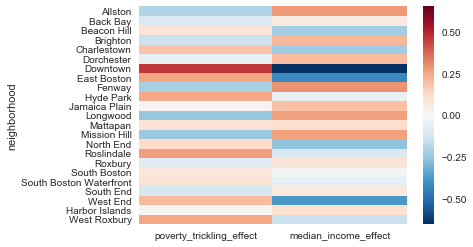

In [40]:
sns.heatmap(neighborhood_trickling_effect[['poverty_trickling_effect' ,'median_income_effect']])

In [41]:
# Means of commute
MeansOfCommuting = pd.read_json("data/MeansOfCommuting.json").transpose()
MeansOfCommuting

,Bicycle,Bicycle %,Bus or trol- ley bus,Bus or trolley %,"Car, truck, or van","Car, truck, or van %",Other,Other %,Railroad,Railroad %,Subway or elevated,Subway or elevated %,Walked,Walked %,Worked at home,Worked at home %,Workers 16 years and over
Allston,448,4.40%,"1,546",15.30%,"2,776",27.40%,517,5.10%,20,0.20%,"1,850",18.30%,"2,509",24.80%,460,4.50%,"10,126"
Back Bay,262,2.40%,406,3.80%,"3,437",32.00%,386,3.60%,178,1.70%,"1,957",18.20%,"3,387",31.60%,717,6.70%,"10,730"
Beacon Hill,123,1.90%,295,4.50%,"1,087",16.60%,82,1.30%,112,1.70%,"1,081",16.50%,"3,436",52.60%,321,4.90%,"6,537"
Boston,"6,339",1.90%,"44,228",13.50%,"149,078",45.50%,"6,385",1.90%,"3,790",1.20%,"57,714",17.60%,"48,095",14.70%,"12,011",3.70%,"327,640"
Brighton,543,2.20%,"3,366",13.50%,"11,901",47.70%,"1,221",4.90%,78,0.30%,"3,785",15.20%,"2,643",10.60%,"1,422",5.70%,"24,959"
Charlestown,184,1.80%,"1,395",13.50%,"5,555",53.60%,165,1.60%,97,0.90%,"1,200",11.60%,"1,271",12.30%,497,4.80%,"10,364"
Dorchester,415,0.70%,"10,550",19.00%,"31,319",56.30%,862,1.50%,389,0.70%,"8,865",15.90%,"2,279",4.10%,955,1.70%,"55,634"
Downtown,71,0.80%,212,2.50%,"1,639",19.40%,184,2.20%,97,1.10%,"1,157",13.70%,"4,462",52.80%,623,7.40%,"8,445"
East Boston,63,0.30%,"1,518",6.40%,"8,198",34.40%,286,1.20%,162,0.70%,"12,082",50.80%,"1,140",4.80%,357,1.50%,"23,806"
Fenway,379,2.50%,"1,260",8.40%,"2,351",15.70%,445,3.00%,10,0.10%,"2,755",18.40%,"6,924",46.20%,850,5.70%,"14,974"


In [42]:
bike_commute = MeansOfCommuting['Bicycle %']
bike_commute = bike_commute.apply(lambda x: float(x.replace("%","")))
bike_commute

Allston                    4.4
Back Bay                   2.4
Beacon Hill                1.9
Boston                     1.9
Brighton                   2.2
Charlestown                1.8
Dorchester                 0.7
Downtown                   0.8
East Boston                0.3
Fenway                     2.5
Hyde Park                  0.3
Jamaica Plain              6.3
Longwood                   1.4
Massachusetts              0.8
Mattapan                   0.1
Mission Hill               6.9
North End                  2.3
Roslindale                 2.1
Roxbury                    1.6
South Boston               1.6
South Boston Waterfront    1.2
South End                  3.0
West End                   1.0
West Roxbury               0.3
Name: Bicycle %, dtype: float64

In [43]:
neighborhood_pair['bike_commute_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([bike_commute]),axis=1)
neighborhood_pair

,neighborhood1,neighborhood2,is_neighbor,neighborhood_distance,poverty_percentage_diff,median_income_diff,bike_commute_diff
0,Allston,Back Bay,3.077847,0.0,21.3,-57698.0,2.0
1,Allston,Beacon Hill,4.394937,0.0,24.2,-52351.0,2.5
2,Allston,Brighton,1.461400,1.0,10.5,-11129.0,2.2
3,Allston,Charlestown,4.836603,0.0,15.7,-56757.0,2.6
4,Allston,Dorchester,4.848876,0.0,10.8,-11914.0,3.7
5,Allston,Downtown,2.322939,0.0,10.5,-26622.0,3.6
6,Allston,East Boston,7.165537,0.0,14.7,-15530.0,4.1
7,Allston,Fenway,2.883836,1.0,-8.9,5097.0,1.9
8,Allston,Hyde Park,2.240952,0.0,24.5,-28251.0,4.1
9,Allston,Jamaica Plain,1.679266,0.0,15.8,-41438.0,-1.9


In [44]:
neighborhood_trickling_effect['bike_commute_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['bike_commute_diff']),axis=1)
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect,median_income_effect,bike_commute_effect
neighborhood,,,,
Allston,Allston,-0.198107,0.284505,-0.077934
Back Bay,Back Bay,-0.097040,0.059167,0.022882
Beacon Hill,Beacon Hill,0.082788,-0.223964,0.209385
Brighton,Brighton,-0.139441,0.214007,-0.293962
Charlestown,Charlestown,0.186028,-0.229338,0.196309
Dorchester,Dorchester,-0.049082,0.207603,0.234238
Downtown,Downtown,0.464730,-0.651067,0.225239
East Boston,East Boston,0.260231,-0.417164,0.189513
Fenway,Fenway,-0.215247,0.290078,-0.443220


In [45]:
walk_commute = MeansOfCommuting['Walked %']
walk_commute = walk_commute.apply(lambda x: float(x.replace("%","")))
neighborhood_pair['walk_commute_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([walk_commute]),axis=1)
neighborhood_trickling_effect['walk_commute_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['walk_commute_diff']),axis=1)
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect,median_income_effect,bike_commute_effect,walk_commute_effect
neighborhood,,,,,
Allston,Allston,-0.198107,0.284505,-0.077934,-0.099931
Back Bay,Back Bay,-0.097040,0.059167,0.022882,-0.466123
Beacon Hill,Beacon Hill,0.082788,-0.223964,0.209385,-0.498679
Brighton,Brighton,-0.139441,0.214007,-0.293962,-0.019890
Charlestown,Charlestown,0.186028,-0.229338,0.196309,-0.211193
Dorchester,Dorchester,-0.049082,0.207603,0.234238,0.342684
Downtown,Downtown,0.464730,-0.651067,0.225239,-0.348366
East Boston,East Boston,0.260231,-0.417164,0.189513,-0.136698
Fenway,Fenway,-0.215247,0.290078,-0.443220,-0.273938


In [46]:
bus_commute = MeansOfCommuting['Bus or trolley %']
bus_commute = bus_commute.apply(lambda x: float(x.replace("%","")))
neighborhood_pair['bus_commute_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([bus_commute]),axis=1)
neighborhood_trickling_effect['bus_commute_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['bus_commute_diff']),axis=1)
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect,median_income_effect,bike_commute_effect,walk_commute_effect,bus_commute_effect
neighborhood,,,,,,
Allston,Allston,-0.198107,0.284505,-0.077934,-0.099931,0.019777
Back Bay,Back Bay,-0.097040,0.059167,0.022882,-0.466123,0.072580
Beacon Hill,Beacon Hill,0.082788,-0.223964,0.209385,-0.498679,0.286054
Brighton,Brighton,-0.139441,0.214007,-0.293962,-0.019890,-0.128390
Charlestown,Charlestown,0.186028,-0.229338,0.196309,-0.211193,0.326723
Dorchester,Dorchester,-0.049082,0.207603,0.234238,0.342684,-0.775253
Downtown,Downtown,0.464730,-0.651067,0.225239,-0.348366,0.416662
East Boston,East Boston,0.260231,-0.417164,0.189513,-0.136698,0.160196
Fenway,Fenway,-0.215247,0.290078,-0.443220,-0.273938,-0.198143


In [47]:
car_commute = MeansOfCommuting['Car, truck, or van %']
car_commute = car_commute.apply(lambda x: float(x.replace("%","")))
neighborhood_pair['car_commute_diff'] = neighborhood_pair.apply(cal_neighborhood_diff,args=([car_commute]),axis=1)
neighborhood_trickling_effect['car_commute_effect'] = neighborhood_trickling_effect.apply(get_corr, args=(['car_commute_diff']),axis=1)
neighborhood_trickling_effect

,neighborhood,poverty_trickling_effect,median_income_effect,bike_commute_effect,walk_commute_effect,bus_commute_effect,car_commute_effect
neighborhood,,,,,,,
Allston,Allston,-0.198107,0.284505,-0.077934,-0.099931,0.019777,0.152357
Back Bay,Back Bay,-0.097040,0.059167,0.022882,-0.466123,0.072580,0.432867
Beacon Hill,Beacon Hill,0.082788,-0.223964,0.209385,-0.498679,0.286054,0.341522
Brighton,Brighton,-0.139441,0.214007,-0.293962,-0.019890,-0.128390,0.143851
Charlestown,Charlestown,0.186028,-0.229338,0.196309,-0.211193,0.326723,0.251580
Dorchester,Dorchester,-0.049082,0.207603,0.234238,0.342684,-0.775253,-0.248134
Downtown,Downtown,0.464730,-0.651067,0.225239,-0.348366,0.416662,0.306494
East Boston,East Boston,0.260231,-0.417164,0.189513,-0.136698,0.160196,0.030107
Fenway,Fenway,-0.215247,0.290078,-0.443220,-0.273938,-0.198143,0.424154


# This using 'is_neighbor' tag

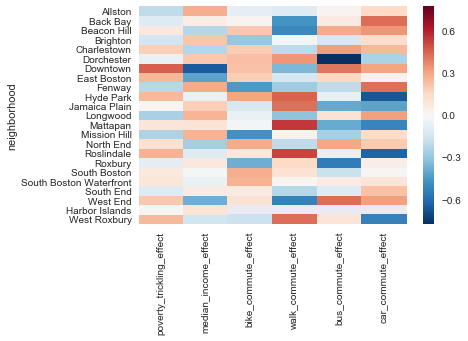

In [48]:
neighborhood_trickling_effect.index = neighborhood_trickling_effect.neighborhood

sns.heatmap(neighborhood_trickling_effect.iloc[:,1:])

# This is using  distance from neighorhood center gps

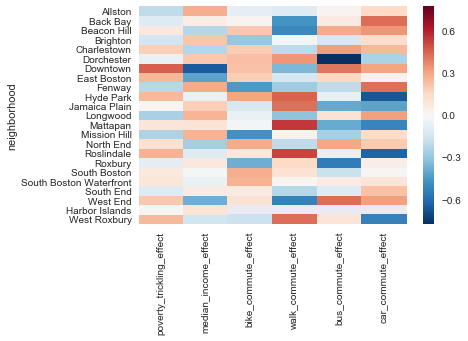

In [49]:
neighborhood_trickling_effect.index = neighborhood_trickling_effect.neighborhood

sns.heatmap(neighborhood_trickling_effect.iloc[:,1:])

# This is using distance from neighorhood center gps and 'is_neighbor' tag

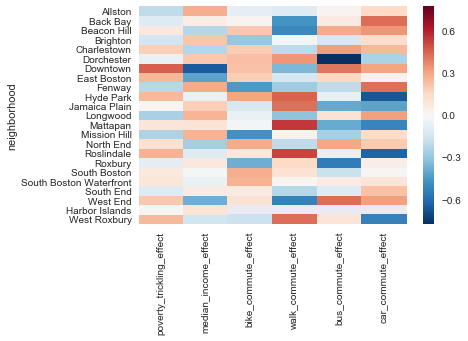

In [50]:
neighborhood_trickling_effect.index = neighborhood_trickling_effect.neighborhood

sns.heatmap(neighborhood_trickling_effect.iloc[:,1:])